[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/AM/blob/main/4_GD_RegLog/R_Log.ipynb)


### **Aprendizado de Máquina e Decisões Dirigidas por Dados**

**TPP - UFF**

**Docente: Diogo Ferreira de Lima Silva (TEP-UFF)**

# Regressão Logística

## Importando bibliotecas

In [1]:
%load_ext autoreload
%autoreload 2

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lembrando as Funções da Regressão Logística


- **Problema de classificação binária**: temos $y^{(i)} \in \mathcal{C} =\{0,1\}$

Em regressão logística:

- $\hat{f}(\mathbf{x}_i) \approx P(y^{(i)}=1|\vec{x}^{(i)})$

Temos que a função que aprenderemos a partir dos dados deve estimar a probabilidade de uma entrada $\vec{x}^{(i)}$ pertencer à classe 1. Nesse cenário, precisamos que:

$$0 \leq \hat{f}(\mathbf{x}_i) \leq 1 $$


Para isso, usamos a função sigmoide:

$$ g(\vec{w} \cdot \vec{x} + b) = \frac{1}{1 + e^{-(\vec{w} \cdot \vec{x} + b)}}$$

ou, usando $z = \vec{w} \cdot \vec{x} + b$:

$$ g (z)=\frac{1}{1 + e^{-z}}$$

## Implementando a Função sigmoide

In [79]:
def sigmoid (z):
    return 1/(1 + np.exp(-z)) 

In [80]:
print ('Sigmoid(-1) = ', sigmoid(-1))
print ('Sigmoid(0) = ', sigmoid(0))
print ('Sigmoid(1) = ', sigmoid(1))
print ('Sigmoid(10) = ', sigmoid(10))

Sigmoid(-1) =  0.2689414213699951
Sigmoid(0) =  0.5
Sigmoid(1) =  0.7310585786300049
Sigmoid(10) =  0.9999546021312976


## Visualizando a função sigmoide

Vamos criar um vetor de 100 pontos linearmente espaçados entre -20 e 20.

Lembrando que a função sigmoide é aplicada em $z= \vec{w} \cdot \vec{x} + b$. 

Assim, o vetor acima representa valores de $z$.

In [81]:
z = np.linspace(-20, 20, 100)
z


array([-20.        , -19.5959596 , -19.19191919, -18.78787879,
       -18.38383838, -17.97979798, -17.57575758, -17.17171717,
       -16.76767677, -16.36363636, -15.95959596, -15.55555556,
       -15.15151515, -14.74747475, -14.34343434, -13.93939394,
       -13.53535354, -13.13131313, -12.72727273, -12.32323232,
       -11.91919192, -11.51515152, -11.11111111, -10.70707071,
       -10.3030303 ,  -9.8989899 ,  -9.49494949,  -9.09090909,
        -8.68686869,  -8.28282828,  -7.87878788,  -7.47474747,
        -7.07070707,  -6.66666667,  -6.26262626,  -5.85858586,
        -5.45454545,  -5.05050505,  -4.64646465,  -4.24242424,
        -3.83838384,  -3.43434343,  -3.03030303,  -2.62626263,
        -2.22222222,  -1.81818182,  -1.41414141,  -1.01010101,
        -0.60606061,  -0.2020202 ,   0.2020202 ,   0.60606061,
         1.01010101,   1.41414141,   1.81818182,   2.22222222,
         2.62626263,   3.03030303,   3.43434343,   3.83838384,
         4.24242424,   4.64646465,   5.05050505,   5.45

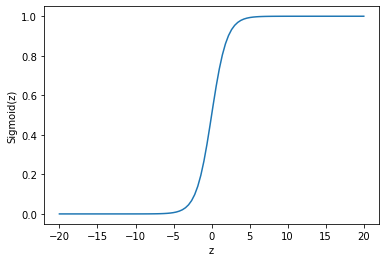

In [83]:
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("Sigmoid(z)") 
plt.show()

## Função Perda e Função Custo

**Chegamos então a nossa suposição:**

$${f}_{\vec{w},b}(\vec{x}) = g (\vec{w} \cdot \vec{x} + b)$$

### Função Perda e Função Custo

Como visto na aula, a perda para uma determinada observação $\vec{x}^{(i)}$ é dada por:

$$ L({f}_{\vec{w},b}(\vec{x}), y^{(i)}) = -[y{(i)}\times\log{{f}_{\vec{w},b}(\vec{x})} + (1-y^{(i)})\times\log{(1- {f}_{\vec{w},b}(\vec{x}))}]$$



Por sua vez, a função custo é dada pela média das perdas obtidas com os $m$ exemplos de treinamento. Dessa forma, temos:

$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}({f}_{\vec{w},b}(\vec{x}), y{(i)}) $$


## Gradiente Descendente



Vimos que no método gradiente descendente, os parâmetros da nossa função são atualizados de acordo com suas derivadas:

$$w_j = w_j - \alpha \times \frac{\partial J}{\partial w_j}, \forall j$$

$$b = b - \alpha \times \frac{\partial J}{\partial b}$$

Vimos o processo para regressão linear.

Porém, como encontrar essas derivadas para o caso da regressão logística?

### Aprendendo o vetor $\vec{w}$ e $b$

### Chegando ao custo (forward)

**Processo para chegarmos ao custo:**

1. Calculamos o produto interno $$z^{(i)} = z(x^{(i)})=\vec{w} \cdot \vec{x}^{(i)}$$
2. Calculamos a função sigmoide. Vamos chamar a sigmoide de função de ativação $$a^{(i)} = g (z^{(i)})$$
    - Perceba que no nosso caso, $a^{(i)} = f_{\vec{w},b}(x^{(i)})$ 
    
3. Perda individual: $$ \mathcal{L}(a^{(i)}, y^{(i)}) = -[y{(i)}\times\log{a^{(i)}} + (1-y^{(i)})\times\log{(1-a^{(i)})}]$$
4. Custo total: $$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)}) $$


### Chegando às derivadas parciais (backward)


**Processo para chegarmos às derivadas parciais:**

1. Derivada parcial da perda $\mathcal{L}(a^{(i)}, y^{(i)})$ em função de $a^{(i)}$: 
$$da^{(i)} = \frac{\partial \mathcal{L}}{\partial a^{(i)}} =  -\frac{y^{(i)}}{a^{(i)}} + \frac{1-y^{(i)}}{1-a^{(i)}}$$

2. Derivada parcial da perda $\mathcal{L}(a^{(i)}, y^{(i)})$ em função de $z_i$: 
$$dz^{(i)}=\frac{\partial \mathcal{L}}{\partial z^{(i)}} = \frac{\partial \mathcal{L}}{\partial a^{(i)}} \times \frac{\partial a^{(i)}}{\partial z^{(i)}} = a^{(i)} - y^{(i)}$$


3. Derivada parcial da perda $\mathcal{L}(a^{(i)}, y^{(i)})$ em função de $w_j$: 
$$dw_j=\frac{\partial \mathcal{L} (a^{(i)}, y^{(i)})}{\partial w_j} = \frac{\partial \mathcal{L}}{\partial z^{(i)}} \times \frac{\partial z^{(i)}}{\partial w_j} = x^{(i)}_j\times dz^{(i)} $$

4. Derivada parcial da perda $\mathcal{L}(a^{(i)}, y^{(i)})$ em função de $b$: 
$$db=\frac{\partial \mathcal{L} (a^{(i)}, y^{(i)})}{\partial b} = \frac{\partial \mathcal{L}}{\partial z^{(i)}} \times \frac{\partial z^{(i)}}{\partial b} = dz^{(i)} $$


5. **Considerando agora o custo total:**

$$ \frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m x_{j}^{(i)} dz^{(i)}$$

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m dz^{(i)}$$



### Comentário

Ora, sabendo que $$dz^{(i)} = a^{(i)} - y{(i)} = f_{\vec{w},b}(x^{(i)}) - y{(i)}$$

Então, chegamos aos seguintes resultados: 

$$ \frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m  (f_{\vec{w},b}(x^{(i)}) - y^{(i)}) x_{j}^{(i)}$$

e

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m  (f_{\vec{w},b}(x^{(i)}) - y^{(i)}) $$


**São resultados semelhantes aos que encontramos na última aula para regressão linear!**

Porém, agora aplicamos à função sigmoide em nossa função linear: $$f_{\vec{w},b}(x^{(i)}) = \frac{1}{1 - e^{-(\vec{w} \cdot \vec{x} + b)}}$$

### Implementando o Gradiente Descendente para Regressão Logística

In [76]:
# Inicialização dos parâmetros
def inicializa (n):
    w = np.zeros(n)
    b = 0
    return w, b

In [77]:
inicializa(10)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 0)

In [9]:
AM.inicializa_parametros(20)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 0)

In [10]:
def fit (X_treino, y_treino, w, b, n_iter, taxa_aprendizado):
    
    m = X_treino.shape[0] # número de linhas (exemplos)
    n = X_treino.shape[1] # número de colunas (atributos)
    
    #Criaremos uma lista vazia para receber os custos em cada iteração
    custos = []
    
    for i in range(n_iter):            
        
        # Z é a multiplicação de cada linha da matriz X pelo vetor w somado ao bias (intercepto) b
        # Se X tem dimensão mxn, Z terá mx1  
        Z = X_treino.dot(w) + b 

        # A (mx1) receberá o sigmoide aplicado em Z
        A = sigmoid(Z)
        
        #Calcula o custo da primeira rodada
        J = (-1/m) * np.sum(y_treino * np.log(A) + (1-y_treino) * np.log(1-A))
        
        custos.append(J) 

        # Calcula dz
        dz = (A - y_treino.T)        
        dz = np.reshape(dz, n)        
        
        #Calcula dw
        dw = np.dot(X_treino.T, dz)/n         
        db = np.sum(dz)/n 
        
        #Atualiza parâmetros
        w = w - taxa_aprendizado * dw  
        b = b - taxa_aprendizado * db      
                       
    return w, b, custos
    

## Aplicação

Vamos aplicar Regressão Logística em um problema de classificação. 

Com base em informações provenietes de exames, queremos aprender uma função que prevê se o cancer é maligno ou benigno.

Dados obtidos em: https://www.kaggle.com/code/kanncaa1/logistic-regression-implementation/data?select=data.csv

In [11]:
import pandas as pd
dados = pd.read_csv("data.csv")
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
# Vejamos o número de exemplos do nosso banco de dados

dados.shape

(569, 33)

In [13]:
dados.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Com base na contagem acima, parece que temos problemas apenas na última coluna, com muitos dados faltantes. Podemos checar isso com a seguinte função:

In [14]:
dados.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Como a primeira coluna é apenas a id do paciente e não um atributo, ela também não será utilizada

Além disso, transformaremos a coluna diagnosis para receber o valor 1 nos casos malignos e 0 nos casos benignos.

In [15]:
dados = pd.read_csv("data.csv")

# Jogando a primeira coluna e a última coluna fora
dados.drop(['Unnamed: 32',"id"], axis=1, inplace=True)

# Transformando os dados da coluna diagnosis
dados.diagnosis = [1 if i == "M" else 0 for i in dados.diagnosis]

dados.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [16]:
#Vejamos quantos exemplos são malignos 

dados.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Separando o rótulo dos demais dados:

In [17]:
y = dados.diagnosis.values
X = dados.drop(['diagnosis'], axis=1)

In [18]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [75]:
print(f"primeiros 10 valores de y: {y[:10]}")
print(f"últimos 10 valores de y: {y[-10:]}")


primeiros 10 valores de y: [1 1 1 1 1 1 1 1 1 1]
últimos 10 valores de y: [0 0 0 1 1 1 1 1 1 0]


### Normalização 

In [20]:
def normaliza_maxmin (M):
    return (M - np.min(M))/(np.max(M)-np.min(M))

In [21]:
X = normaliza_maxmin (X) 
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


### Dividindo em dados de treinamento e teste

In [65]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.15, random_state=0) # 15% dos dados separados para teste


In [66]:
print(f"Tamanho da matriz de atributos de treinamento: {X_treino.shape}")
print(f"Tamanho da matriz de atributos de teste: {X_teste.shape}")


Tamanho da matriz de atributos de treinamento: (483, 30)
Tamanho da matriz de atributos de teste: (86, 30)


(86, 30)

In [67]:
print(f"Tamanho do vetor de rótulos de treinamento: {y_treino.shape}")
print(f"Tamanho do vetor de rótulos de teste: {y_teste.shape}")


Tamanho do vetor de rótulos de treinamento: (483,)
Tamanho do vetor de rótulos de teste: (86,)


## Aplicando as nossas funções

In [29]:
w, b = AM.inicializa_parametros(X_treino.shape[1])


In [31]:
print (f"Nosso vetor inicial de parâmetros w = {w}")
print(f" O número de termos em w é {len(w)}") # número de termos no vetor w
print(f"b foi inicializado como {b}")

Nosso vetor inicial de parâmetros w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
 O número de termos em w é 30
b foi inicializado como 0


In [32]:
w_final, b_final, custo = AM.fit(X_treino, y_treino, w, b, 100, 0.5)

In [33]:
w_final

array([ 0.56876205,  0.06185111,  0.61541003,  0.68687569, -0.36730092,
        0.49872557,  1.04339773,  1.24252588, -0.29840877, -0.71072816,
        0.44983254, -0.4116379 ,  0.38898488,  0.39916851, -0.47046209,
       -0.03306312, -0.03822516, -0.05131085, -0.40135101, -0.21232921,
        0.87792872,  0.2202874 ,  0.86817775,  0.80904379, -0.04716305,
        0.58987225,  0.79706178,  1.26415284,  0.12939793,  0.05463272])

In [34]:
b_final

-2.6149231460578006

In [35]:
custo

[0.6931471805599453,
 0.6772331909561761,
 0.6632270440370427,
 0.6502599080192571,
 0.6379983037657122,
 0.6263052112403193,
 0.6151158952016795,
 0.604392496741101,
 0.5941074553574115,
 0.5842374811276427,
 0.5747613793528213,
 0.5656592738041469,
 0.5569123313031249,
 0.5485026611225908,
 0.5404132715801079,
 0.532628042370608,
 0.5251316987805965,
 0.5179097837849229,
 0.5109486274359644,
 0.5042353140361462,
 0.4977576478400444,
 0.49150411800735455,
 0.4854638634194665,
 0.47962663784990733,
 0.4739827758658983,
 0.4685231597413151,
 0.4632391875810571,
 0.4581227427917551,
 0.4531661649818537,
 0.44836222233333706,
 0.4437040854558093,
 0.43918530270964634,
 0.4347997769670548,
 0.43054174376690685,
 0.4264057508101676,
 0.42238663873675536,
 0.4184795231211043,
 0.4146797776219869,
 0.4109830182218473,
 0.4073850884916542,
 0.4038820458188117,
 0.40047014853775176,
 0.3971458439052938,
 0.39390575686556495,
 0.3907466795521147,
 0.38766556147776055,
 0.3846595003655993,
 0.381

In [31]:
custo[0:10]

[0.6931471805599453,
 0.6772331909561761,
 0.6632270440370427,
 0.6502599080192571,
 0.6379983037657122,
 0.6263052112403193,
 0.6151158952016795,
 0.604392496741101,
 0.5941074553574115,
 0.5842374811276427]

### Aplicando o modelo nos dados de teste

In [84]:
def previsao(X_teste, w_final, b_final):   
        Z = X_teste.dot(w_final) + b_final # Calcula Z para a matriz de atributos de teste
        A = sigmoid(Z)    # Calcula A aplicando a função sigmoid
        
        # A previsão será 1 se A > 0,5. Poderíamos usar outro limiar! Seria fácil resolver isso.
        y_previsto = np.where(A > 0.5, 1, 0)        
        
        return A, y_previsto

In [61]:
A_test, y_previsto = AM.previsao (X_teste, w_final, b_final)

y_previsto

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [62]:
y_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [63]:
def acuracia(y_teste, y_previsto):
    
    m=len(y_teste) # recebe o número de exemplos para comparar
    conta_correto = 0 # inicializa a contagem de acertos
    
    # Para cada exemplo, compare y_test com y_previsto
    for i in range(m):
        if y_teste[i] == y_previsto[i]:
            conta_correto += 1
    
    #Retorne a acurácia média
    return conta_correto / m

In [64]:
AM.acuracia(y_teste, y_previsto)

0.9418604651162791

In [51]:
J_test = (-1/len(y_test)) * np.sum (y_test * np.log(A_test) + (1-y_test) * np.log(1-A_test))

In [52]:
J_test

0.28530866254185905

## Regressão Logística usando o sklearn

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
modelo_LR = LogisticRegression()
modelo_LR

LogisticRegression()

In [55]:
modelo_LR.fit(X_treino, y_treino)

LogisticRegression()

In [56]:
modelo_LR.predict(X_teste)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [57]:
modelo_LR.score(X_teste, y_teste)

0.9767441860465116

In [58]:
# Tudo em 1 linha de código

LogisticRegression().fit(X_train,y_train).score(X_test,y_test)

0.9767441860465116

## Cross validation na Regressão Logística

In [59]:
from sklearn.model_selection import cross_val_score
modelo = LogisticRegression()
resultados = cross_val_score (modelo, X, y, cv=5)
print(resultados)
print(resultados.mean())

[0.95614035 0.96491228 0.97368421 0.95614035 0.96460177]
0.9630957925787922


# Exercício

EM nossa função previsao, definimos a classe y_previsto de acordo com um limiar de 0,5.

1. Altere a função para que o usuário possa passar o limiar desejado como parâmetro.
2. Aplique a função com diferentes limiares para obter novos valores de acurácia em nossa aplicação.